[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Fast_SMA,Slow_SMA,Signal,Entry_Exit,Daily_Return,Strategy_Return,Market_Wealth,Strategy_Wealth
Ticker,GOLD,GOLD,GOLD,GOLD,GOLD,,,,,,,,
Date,,,,,,,,,,,,,
2024-01-02,27.849943,29.278874,27.750581,28.474509,315900,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2024-01-03,26.988800,28.275782,26.963249,27.566049,316300,NaN,NaN,0,0.0,-0.030921,-0.000000,0.969079,1.000000
2024-01-04,27.698534,27.963500,26.941484,27.064505,262100,NaN,NaN,0,0.0,0.026297,0.000000,0.994563,1.000000
2024-01-05,27.584972,28.219001,27.289723,27.490341,174600,NaN,NaN,0,0.0,-0.004100,-0.000000,0.990486,1.000000
2024-01-08,27.745850,27.812091,26.733297,27.424104,203500,NaN,NaN,0,0.0,0.005832,0.000000,0.996262,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-12,42.830002,43.419998,40.389999,40.970001,1172900,36.785,33.458333,1,0.0,0.098205,0.098205,1.537885,1.756695
2026-01-13,41.680000,43.490002,41.096001,43.279999,797300,37.611,33.890667,1,0.0,-0.026850,-0.026850,1.496592,1.709527


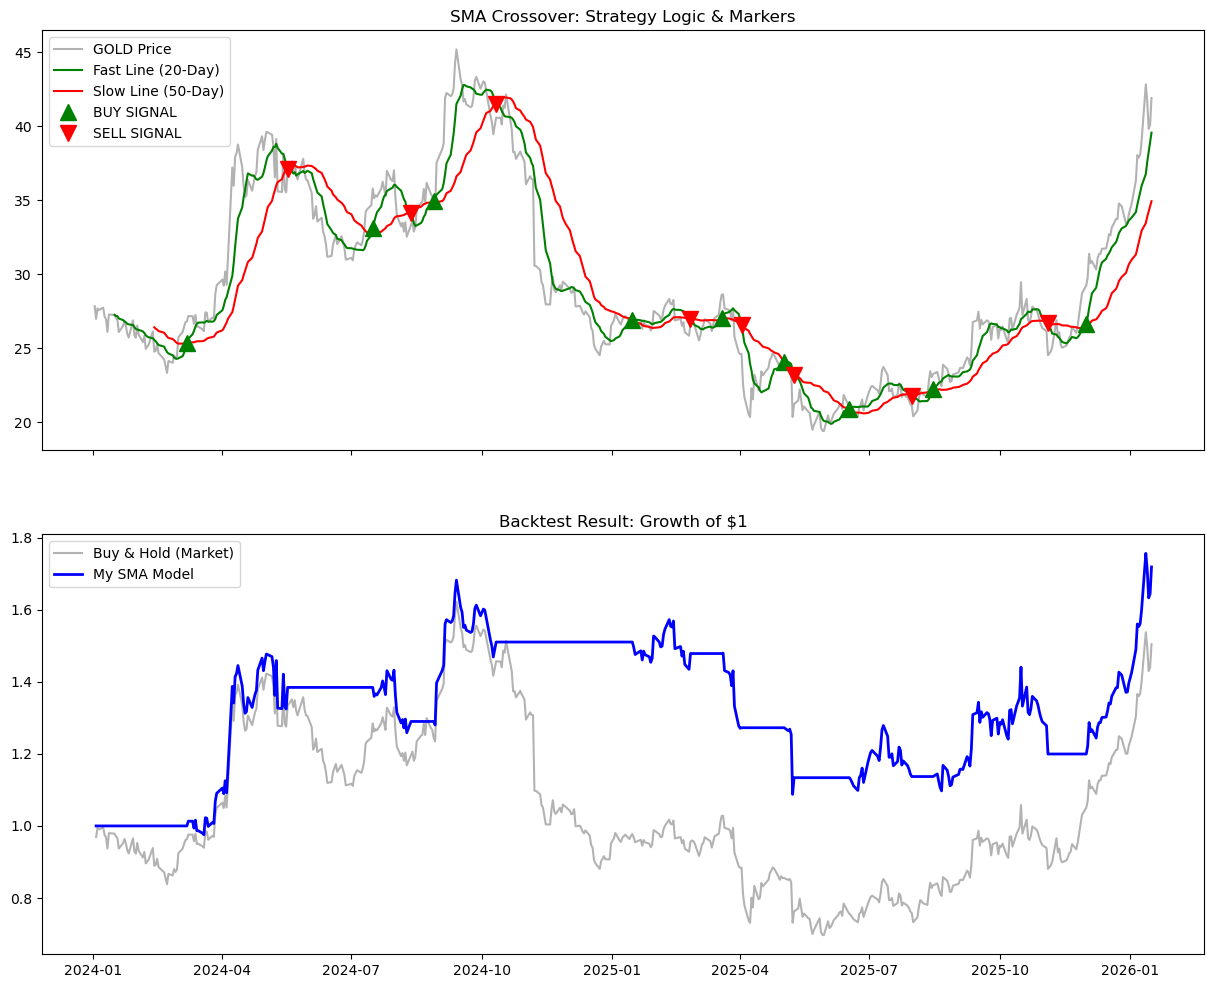

In [10]:

# PART 1: T(IMPORTS)
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# PART 2: (INPUTS)
# We grab 2 years of Gold data from Yahoo Finance

df = yf.download("GOLD", start="2024-01-01")


# PART 3: (MOVING AVERAGES)

# Fast Line: Recent momentum (20 days)
df['Fast_SMA'] = df['Close'].rolling(window=10).mean()

# Slow Line: Historical truth (50 days)
df['Slow_SMA'] = df['Close'].rolling(window=30).mean()

# PART 4: (SIGNALS)

# Start with 0 (Cash). If Fast > Slow, change to 1 (Invested)
df['Signal'] = 0
df.loc[df['Fast_SMA'] > df['Slow_SMA'], 'Signal'] = 1

# Identify the exact day of the "Crossover" for our markers
# .diff() shows the change: 1 = Bought today, -1 = Sold today to make the triangle markers
df['Entry_Exit'] = df['Signal'].diff()

# PART 5: (BACKTEST)

# Calculate daily % change of the stock
df['Daily_Return'] = df['Close'].pct_change()

# REALISM: Use yesterday's signal for today's price change
df['Strategy_Return'] = df['Signal'].shift(1) * df['Daily_Return']

# Cumulative Growth: Turn $1 into a wealth curve
df['Market_Wealth'] = (1 + df['Daily_Return']).cumprod()
df['Strategy_Wealth'] = (1 + df['Strategy_Return']).cumprod()

# PART 6: VISUALIZATION (THE CHART)

# We will create two charts: One for the lines/markers, one for the wealth
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Top Chart: Price and SMA Lines
ax1.plot(df['Close'], label='GOLD Price', color='black', alpha=0.3)
ax1.plot(df['Fast_SMA'], label='Fast Line (20-Day)', color='green', linewidth=1.5)
ax1.plot(df['Slow_SMA'], label='Slow Line (50-Day)', color='red', linewidth=1.5)

# Add Triangles for Buy/Sell
ax1.plot(df[df['Entry_Exit'] == 1].index, df['Fast_SMA'][df['Entry_Exit'] == 1], '^', markersize=12, color='g', label='BUY SIGNAL')
ax1.plot(df[df['Entry_Exit'] == -1].index, df['Fast_SMA'][df['Entry_Exit'] == -1], 'v', markersize=12, color='r', label='SELL SIGNAL')
ax1.set_title("SMA Crossover: Strategy Logic & Markers")
ax1.legend()

# Bottom Chart: Wealth Comparison
ax2.plot(df['Market_Wealth'], label='Buy & Hold (Market)', color='gray', alpha=0.6)
ax2.plot(df['Strategy_Wealth'], label='My SMA Model', color='blue', linewidth=2)
ax2.set_title("Backtest Result: Growth of $1")
ax2.legend()
display(df)
plt.show()